In [1]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cocpit import config as config

import cocpit

sns.set_style("whitegrid")
import torch
%load_ext autoreload
%autoreload 2

In [10]:
plt_params = {
    "axes.labelsize": "small",
    "axes.titlesize": "large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [3]:
#  make predictions on each batch of images,
#  and concatenate the precitions across batches
p = cocpit.predictions.LoaderPredictions()
with torch.no_grad():
    for fold in range(config.KFOLD+1):
        model = p.load_model(fold)
        val_loader = p.load_val_loader(fold)
        for ((imgs, labels, paths), batch) in val_loader:
            b = cocpit.predictions.BatchPredictions(imgs, model)
            b.find_max_preds()
            b.top_k_preds(len(config.CLASS_NAMES))
            p.append_batch(b, paths, labels)
p.concatenate_loader_vars()


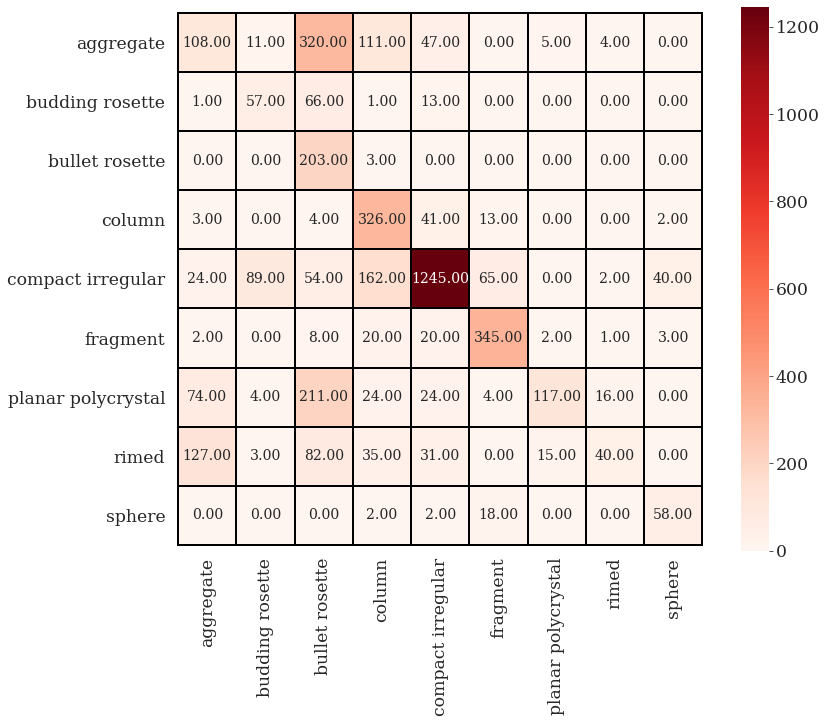

In [11]:
# plot/save conf matrix from one val_loader
# don't normalize (show magnitude of predictions per class)
save_name = "/ai2es/plots/conf_matrix_v0.0.0.pdf"

cm = cocpit.plotting_scripts.confusion_matrix.conf_matrix(p.labels, p.max_preds, norm=None, save_fig=False)
